# K-NEIGHBOURS

## OBJECT:
## Predict the quality of a red wine based on its chemical characteristics

### 0. Data ingestion

In [168]:
import pandas as pd
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [169]:
df_wine = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv", sep = ";")

### 1. Data set general information

In [170]:
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [171]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [172]:
df_wine.duplicated().sum()

np.int64(240)

In [173]:
df_wine[df_wine.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [174]:
df_wine.drop_duplicates(inplace=True)

In [175]:
df_wine.shape

(1359, 12)

In [176]:
missing_values = df_wine.isnull().sum()
missing_values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

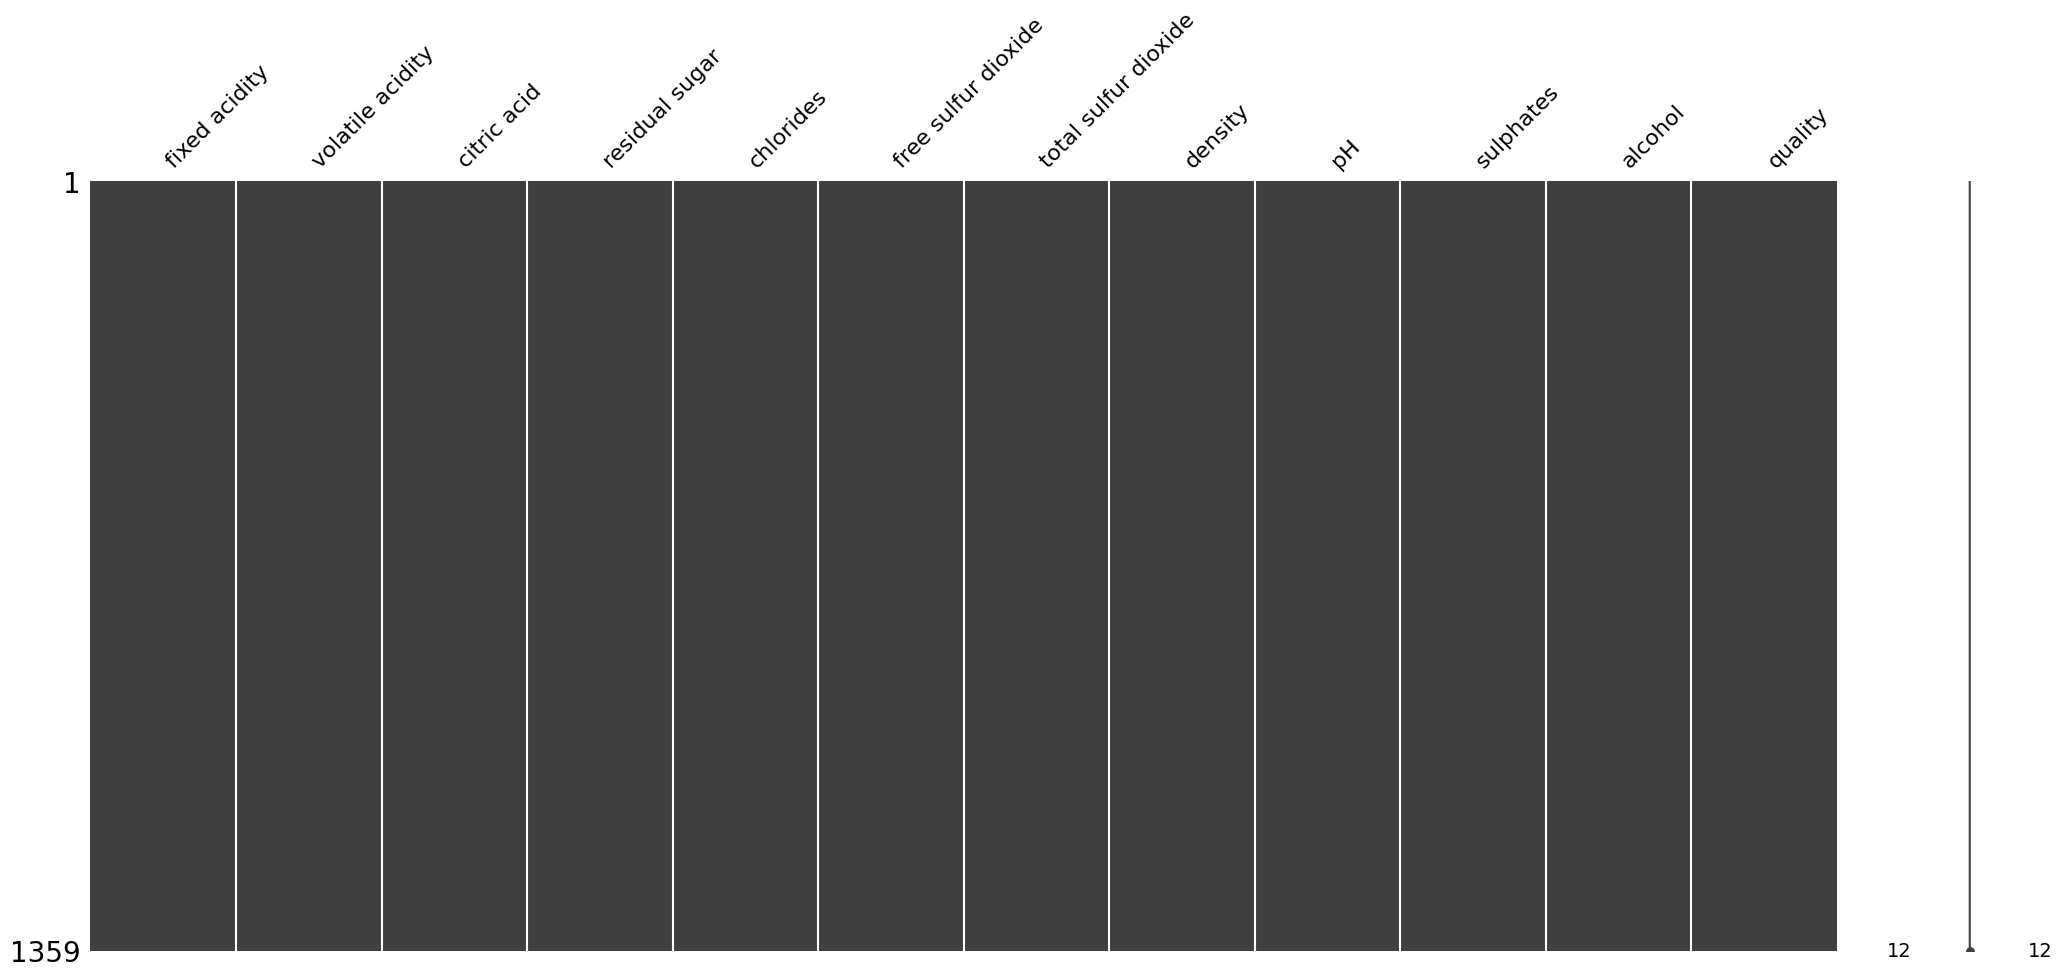

In [177]:
msno.matrix(df_wine)

### 2. Data division

In [178]:
X = df_wine.drop("quality", axis=1)
y = df_wine["quality"]

In [179]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.4, random_state = 42)
X_test, X_anon, y_test, y_anon = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42)
X_train.shape, X_test.shape, X_anon.shape, df_wine.shape

((815, 11), (272, 11), (272, 11), (1359, 12))

### 3. Build and train a K-NEAR NEIGHBOURS (KNN)

#### 3.0. Variable scaling:

In [180]:
scaler = StandardScaler()
scaler.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [181]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 3.1. KNN model:

In [182]:
knn = KNeighborsClassifier(n_neighbors = 5)

### 3.2. KNN model training with scaled data set:

In [183]:
knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [184]:
y_pred = knn.predict(X_test_scaled)

### 4. Model evaluation

#### 4.0. Accuracy:

In [185]:
knn_accuracy = accuracy_score(y_test, y_pred)

In [186]:
print("Accuracy:", knn_accuracy)

Accuracy: 0.4852941176470588


#### 4.1. Confusion_matrix:

In [187]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 0,  1,  3,  0,  0,  0],
       [ 0,  0,  9,  3,  0,  0],
       [ 0,  2, 71, 31,  3,  0],
       [ 0,  0, 43, 49, 12,  0],
       [ 0,  0,  9, 20, 12,  0],
       [ 0,  0,  1,  2,  1,  0]])

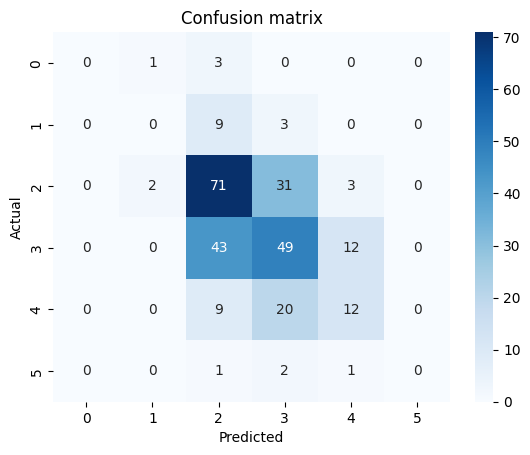

In [188]:
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### 4.2. Classification report:

In [189]:
report = classification_report(y_test, y_pred)
report

/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


'              precision    recall  f1-score   support\n\n           3       0.00      0.00      0.00         4\n           4       0.00      0.00      0.00        12\n           5       0.52      0.66      0.58       107\n           6       0.47      0.47      0.47       104\n           7       0.43      0.29      0.35        41\n           8       0.00      0.00      0.00         4\n\n    accuracy                           0.49       272\n   macro avg       0.24      0.24      0.23       272\nweighted avg       0.45      0.49      0.46       272\n'

<span style = "color:yellow"> Some classes (for example, 3 o 4) in the test set (y_test) were not predicted by the model, therefore the accuracy for those classes can't be calculated; and is set to 0.0.

This can happen if:
The model is poorly fitted (for example, k is not appropriate).
There are few samples of those classes in the training set.
The classes are unbalanced

<span style = "color:orange"> Using "zero_division" parameter, we can avoid the warning and control how 0.0 is displayed:
This will display 1.0 instead of 0.0 when precision or recall can't be calculated

In [190]:
print(classification_report(y_test, y_pred, zero_division = 1))

              precision    recall  f1-score   support

           3       1.00      0.00      0.00         4
           4       0.00      0.00      0.00        12
           5       0.52      0.66      0.58       107
           6       0.47      0.47      0.47       104
           7       0.43      0.29      0.35        41
           8       1.00      0.00      0.00         4

    accuracy                           0.49       272
   macro avg       0.57      0.24      0.23       272
weighted avg       0.48      0.49      0.46       272



#### 5. K-NN optimisation with loops

In [191]:
k_values = list(range(1,21))
accuracies = []

In [192]:
for k in k_values:
    accuracies.append(knn_accuracy)

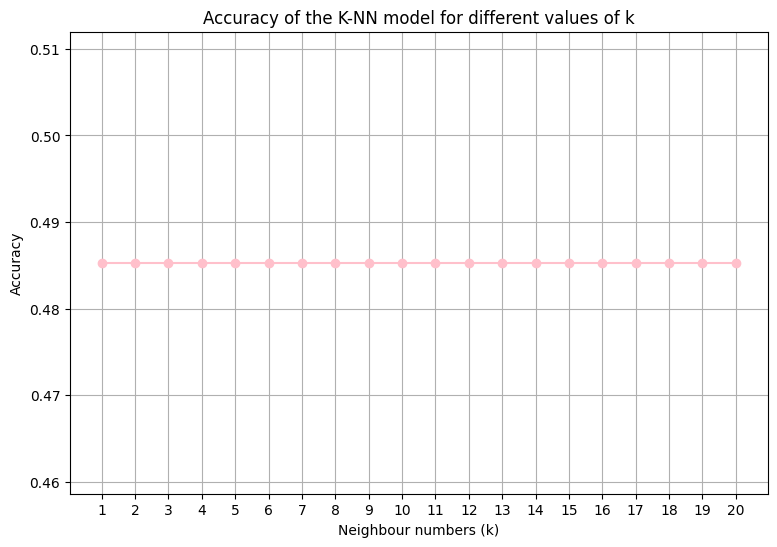

In [193]:
plt.figure(figsize = (9, 6))
plt.plot(k_values, accuracies, marker = "o", linestyle = "-", color = "pink")
plt.title("Accuracy of the K-NN model for different values of k")
plt.xlabel("Neighbour numbers (k)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout
plt.show()

In [194]:
unique, counts = np.unique(y_train, return_counts = True)
print(dict(zip(unique, counts)))

{np.int64(3): np.int64(5), np.int64(4): np.int64(32), np.int64(5): np.int64(351), np.int64(6): np.int64(316), np.int64(7): np.int64(100), np.int64(8): np.int64(11)}


<span style = "color:yellow">An attempt was made with class 3, but the modelwas un balanced. It is now being tested with class 5

### 6. CONCLUSIONS

The graph shows that accuracy remains almost constant FOR all values of k between 1 and 20.
This indicates that the model is not learning to distinguish between classes well, probably because:

- The minority classes (3, 4, 8) are not being predicted.
- The model almost always predicts majority classes (5 and 6).
- Changing k doesn't improve performance because the problem lies in class imbalance, not in the number of neighbours.

### 6. RECOMENDATIONS

1. Apply balancing techniques
    SMOTE: generates synthetic examples for minority classes. Subsampling: reduces the number of examples of majority classes.
2. Use more robust metrics
    Instead of just accuracy, use F1-score, recall, or balanced accuracy.
3. Try other models
    Models such as decision trees, random forest, or XGBoost tend to handle unbalanced data better.